<a href="https://colab.research.google.com/github/HurleyJames/GoogleColabExercise/blob/master/Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train a multiclass linear classifier on the CIFAR10 dataset.

In [0]:
#from __future__ import print_function
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import os
%matplotlib inline


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 1.0808 - acc: 0.7385 - val_loss: 0.5738 - val_acc: 0.8684
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4999 - acc: 0.8742 - val_loss: 0.4199 - val_acc: 0.8924
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4096 - acc: 0.8900 - val_loss: 0.3696 - val_acc: 0.9028
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3717 - acc: 0.8981 - val_loss: 0.3448 - val_acc: 0.9077
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3503 - acc: 0.9030 - val_loss: 0.3288 - val_acc: 0.9103
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3362 - acc: 0.9063 - val_loss: 0.3180 - val_acc: 0.9137
Epoch 7/10
60000/60000 [======================

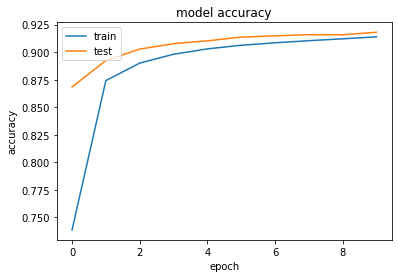

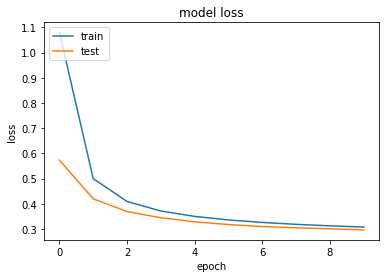

In [0]:
batch_size = 32
num_classes = 10
epochs = 10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# history()

In [0]:
history.history

{'acc': [0.7384833,
  0.87418336,
  0.89005,
  0.89811665,
  0.9029667,
  0.9062667,
  0.90853333,
  0.91041666,
  0.91211665,
  0.91393334],
 'loss': [1.0808088469187418,
  0.49993621060848237,
  0.40956850295861563,
  0.3717004458665848,
  0.35030398622751235,
  0.33624429000616074,
  0.32633275642196335,
  0.3187760640263557,
  0.31287282100319863,
  0.3080314559320609],
 'val_acc': [0.8684,
  0.8924,
  0.9028,
  0.9077,
  0.9103,
  0.9137,
  0.9148,
  0.9159,
  0.9158,
  0.9181],
 'val_loss': [0.573790195274353,
  0.4199317941188812,
  0.369601609659195,
  0.34484514322280885,
  0.32882071619033815,
  0.31802962260246276,
  0.30999509747028353,
  0.30499601831436157,
  0.3011487965941429,
  0.2966593717932701]}

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_test

170500096/170498071 [==============================] - 6s 0us/step


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test.shape

(10000, 10)

In [0]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)